### Problem discription

An exploratory analysis of small/medium-scale protein-protein interactions levergaing networkx library in python.The dataset is the CE-LC worm(C.elegans) available on https://www.inetbio.org/wormnet/downloadnetwork.php. 

The first step require building an undirected graph network. During the analysis, the number of nodes, number of edges, the average degree of the network and the density of the network were calculated. Also, the minimum spanning tree in graph was determined and plotted. The degree distribution histogram was also plotted.

Furthermore, the largest connected component of the network (LC) was determined and plotted. The diameter and the center of the LC graph was calculated. The number of clique communities with 3 nodes in the LC graph was also calculated.

The centrality measures were calculated to determine the name of the protein that when changing its status has potentially the biggest effect on the rest of the network. The centrality measure was possible on all methods except for the eigenvector centrality where calculation failed due to convergence. The centrality measures were calculated to determine the influencial protein.

### Code and Plots

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_table("CE-LC.txt", names = ['source', 'target', 'weight'])
data.head()

,source,target,weight
0,AC3.3,AC3.4,2.945855
1,AC3.3,C03A7.14,2.895269
2,AC3.3,C05D2.1,2.390948
3,AC3.3,C37C3.6,2.945855
4,AC3.3,Y39B6A.1,2.852143


#### 1-    Build the corresponding network (G) with Networkx

In [3]:
G = nx.from_pandas_edgelist(data, edge_attr=True)
G

#### 2-    What are number of nodes, number of edges and the average degree of the network?

(a) What are number of nodes

In [4]:
nx.number_of_nodes(G)

1387

(b) What are number of edges 

In [5]:
nx.number_of_edges(G)

1648

(c) The average degree of the network

In [6]:
list_degree = list(nx.degree(G))
sum_degree = sum([value for key, value in list_degree])
average_degree = sum_degree/(G.number_of_nodes())
average_degree

2.3763518385003604

#### 3-    What is the density of the network.

In [7]:
nx.density(G)

0.001714539566017576

#### 4-    Find the minimum spanning tree in G and draw it.

In [8]:
T = nx.algorithms.minimum_spanning_tree(G)

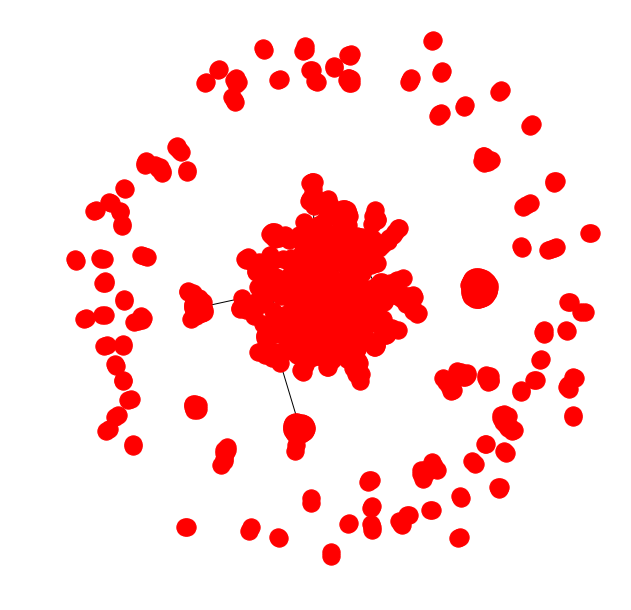

In [9]:
plt.figure(figsize = (8,8))
nx.draw(T)
plt.show()

#### 5-    Draw the degree distribution histogram.

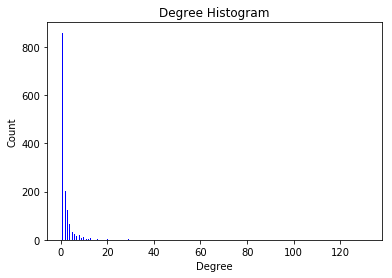

In [10]:
import collections
# degree sequence print "Degree sequence", degree_sequence
degree_sequence = sorted([d for n, d in nx.degree(G)], reverse=True)  
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.5, color='blue')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

#### 6-    Find the largest connected component of the network  (LC) and answer the following questions about LC (or implement the tasks):

1. Draw LC.
2. What is its diameter?
3. What is the center of LC?
4. What is the number of clique communities with 3 nodes?
5. (Optional, for 3 extra points) What is the name of the protein that changing its status has potentially the biggest effect on the rest of the network?

In [11]:
LC = max(nx.connected_component_subgraphs(G), key=len)
LC

**1. Draw LC.**

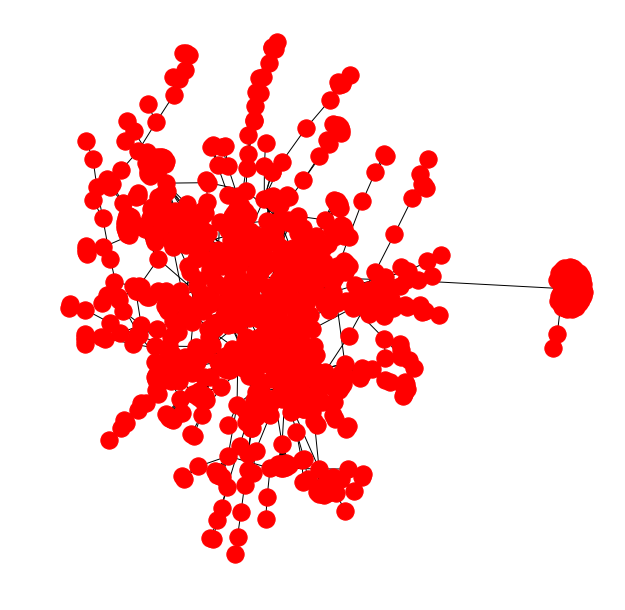

In [12]:
plt.figure(figsize = (8,8))
nx.draw(LC)
plt.show()

**2. What is its diameter?**

In [13]:
nx.diameter(LC)

22

**3. What is the center of LC?**

In [14]:
nx.center(LC)

['C37A5.9', 'C54D1.6']

**4. What is the number of clique communities with 3 nodes?**

In [15]:
#A k-clique community is the union of all cliques of size k 
#that can be reached through adjacent (sharing k-1 nodes) k-cliques.
#so 3 nodes => k-1 nodes => 4-1 nodes = 3 nodes
c = list(nx.algorithms.community.k_clique_communities(LC, k= 4))
len(c)

9

**5. (Optional, for 3 extra points) What is the name of the protein that changing its status has potentially the biggest effect on the rest of the network?**

**Using degree count:** The node F15B10.2 has the highest degree of 68. This node is more influencial degree-wise among its pairs and may pose huge effect on the network if it changes status.

In [16]:
maxkey = None
maxval = None
list_degree = list(nx.degree(LC))
for keys, values in list_degree:
    if maxval == None or maxval < values:
        maxval = values
        maxkey = keys
print(maxkey, maxval)

F15B10.2 68


**Using degree centrality measure:** The node F15B10.2 has the highest degree centrality of approximately 0.0689. This node is more central among its pairs and may pose huge effect on the network if it changes status.

In [17]:
maxkey = None
maxval = None
degree_centrality = nx.degree_centrality(LC)
for keys, values in degree_centrality.items():
    if maxval == None or maxval < values:
        maxval = values
        maxkey = keys
print(maxkey, maxval)

F15B10.2 0.06854838709677419


**Using closeness centrality:** The node Y50D4C.1 has the lowest closeness centrality of approximately 0.0647. This node has the might have better access to information at other nodes or more direct influence on other nodes and may pose huge effect on the network if it changes status.

In [18]:
minkey = None
minval = None
closeness_centrality = nx.closeness_centrality(LC)
for keys, values in closeness_centrality.items():
    if minval == None or minval > values:
        minval = values
        minkey = keys
print(minkey, minval)

Y50D4C.1 0.06467175174392073


**Using betweenness centrality:** The node C23G10.4 has the highest betweenness centrality of approximately 0.1632. This node has the highest betwenness centrality value among its pairs and may pose huge effect on the network if it changes status.

In [19]:
maxkey = None
maxval = None
betweenness_centrality = nx.betweenness_centrality(LC)
for keys, values in betweenness_centrality.items():
    if maxval == None or maxval < values:
        maxval = values
        maxkey = keys
print(maxkey, maxval)

C23G10.4 0.16317993052751278


**Using degree eigenvector centrality:** This method failed due to convergence

In [20]:
"""
#Using degree eigenvector centrality: This method failed due to convergence
maxkey = None
maxval = None
eigen_vector_centrality = nx.eigenvector_centrality(LC)
for keys, values in eigen_vector_centrality.items():
    if maxval == None or maxval < values:
        maxval = values
        maxkey = keys
print(maxkey, maxval)
"""


'\n#Using degree eigenvector centrality: This method failed due to convergence\nmaxkey = None\nmaxval = None\neigen_vector_centrality = nx.eigenvector_centrality(LC)\nfor keys, values in eigen_vector_centrality.items():\n    if maxval == None or maxval < values:\n        maxval = values\n        maxkey = keys\nprint(maxkey, maxval)\n'